In [1]:
import sys
sys.path.append('./fractalNet_/cynet')
import cynet_utils.performance as pp
import cynet_utils.spatial as sp
import seaborn as sns
import pylab as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
def saveFIG(filename='tmp.pdf',AXIS=False):
    '''
        save fig for publication
    '''
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',
                pad_inches = 0,transparent=False) 
    return

In [2]:
cityname='Chicago'
SIMFILE='sim_chicago.csv'
RUNLEN=1195
FLEX_TAIL_LEN=100
T=[7,14,30,60,100]
'''
    OOS periods for which performance is evaluated (in days)
'''
freq=1
'''
    timestep in days
'''

'\n    timestep in days\n'

In [ ]:
P=pp.Performance(SIMFILE,RUNLEN=RUNLEN,FLEX_TAIL_LEN=FLEX_TAIL_LEN,VERBOSE=False)

In [ ]:
T1=np.array(T)//freq
df1=pd.DataFrame(np.array([P.getPaiPae('HOMICIDE-ASSAULT-BATTERY',t,VERBOSE=False) for t in T1]),columns=['PAI','PEI']).assign(type='Violent').assign(horizon=T)
df2=pd.DataFrame(np.array([P.getPaiPae('BURGLARY-THEFT-MOTOR_VEHICLE_THEFT',t,VERBOSE=False) for t in T1]),columns=['PAI','PEI']).assign(type='Property').assign(horizon=T)
rf=pd.concat([df1,df2])
rf.to_csv('paipei_'+cityname+'.csv')

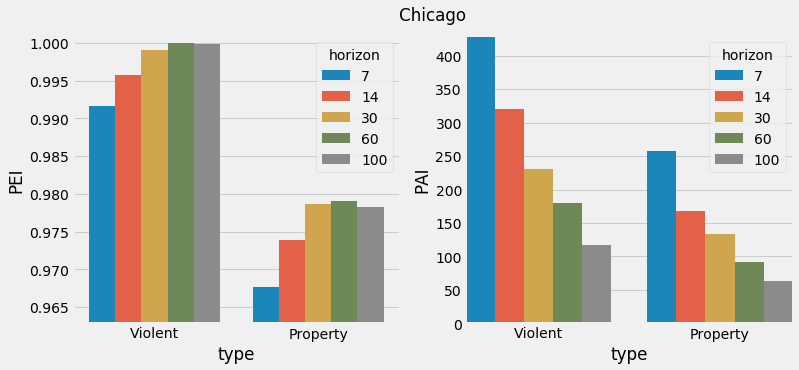

In [3]:
rf=pd.read_csv('paipei_'+cityname+'.csv',index_col=0)
plt.style.use('fivethirtyeight')
figure=plt.figure(figsize=[10,4])
plt.subplots_adjust(hspace=1.5)
plt.subplot(1,2,1)
ax=sns.barplot(ax=plt.gca(),x='type',y='PEI',hue='horizon',data=rf)

ax.set_ylim(.995*rf.PEI.min(),1.001)
plt.subplot(1,2,2)
sns.barplot(ax=plt.gca(),x='type',y='PAI',hue='horizon',data=rf)
plt.suptitle('Chicago',y=1.1)
saveFIG('perf_'+cityname+'.pdf',AXIS=True)